<a href="https://colab.research.google.com/github/maggiedart16/Earth-and-Environmental-Systems-Modeling/blob/main/mod02_CarbonModel_Assignment_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 02: A Box Model Carbon Assignment

### 1. Introduction

In the accompanying notebook [mod02-CarbonModel1.ipynb](./mod02-CarbonModel1.ipynb) and in class we developed a relatively simple model of global carbon balance that assumed that tracked carbon in the atmosphere and biosphere. The system of equations we developed to describe this system are shown below,

$$
\begin{align*}
\frac{dM_1}{dt} &= F_{21} - F_{12}\\
&= k_{21}M_2 - k_{12}M_1
\end{align*}
$$

and,

$$
\begin{align*}
\frac{dM_2}{dt} &= F_{12} - F_{21}\\
&= k_{12}M_1 - k_{21}M_2
\end{align*}
$$

where $M_1$ is the mass of carbon in the atmosphere (GtC), $M_2$ is the mass of carbon in the biosphere (GtC), $F_{12}$ is the flux of carbon from the atmosphere to the biosphere due to photosynthesis (GtC/yr), and $F_{21}$ is the flux of carbon from the biosphere to the atmosphere due to decay and respiration (GtC/yr).

In that notebook we develop a numerical model to describe that system, run it for given initial conditions and with no external inputs of carbon (we call this an "unforced" scenario) and compare it to the analytical solution. We observed that as the time step increased, we departed further from the analytical solution.

In this assignment you will take your model one step more realistic by ensuring that the photosynthetic flux depends on both the amount of carbon in the atmosphere and in the biosphere. Then you will examine the impact of anthropogenic emissions from 1751-2008 on the biosphere and atmosphere, and how alternative future scenarios of emissions mitigation affect your system.

The code cell below contains a couple of new commands and some file names that you will need in this assignment. You will need all of these commands, _but not necessarily

In [5]:
from google.colab import files
uploaded = files.upload()


Saving AnthropogenicEmissions.1751_2008.csv to AnthropogenicEmissions.1751_2008 (3).csv


<ipython-input-39-71515e03d219>:37: RuntimeWarning: overflow encountered in scalar multiply
  F12 = k12 * M1 * M2  # Flux from atmosphere to biosphere (photosynthesis)
<ipython-input-39-71515e03d219>:41: RuntimeWarning: invalid value encountered in scalar subtract
  M1 += (F21 - F12 + cflux_t[day])  # Include anthropogenic emissions
<ipython-input-39-71515e03d219>:42: RuntimeWarning: invalid value encountered in scalar subtract
  M2 += (F12 - F21)  # Update the biosphere mass


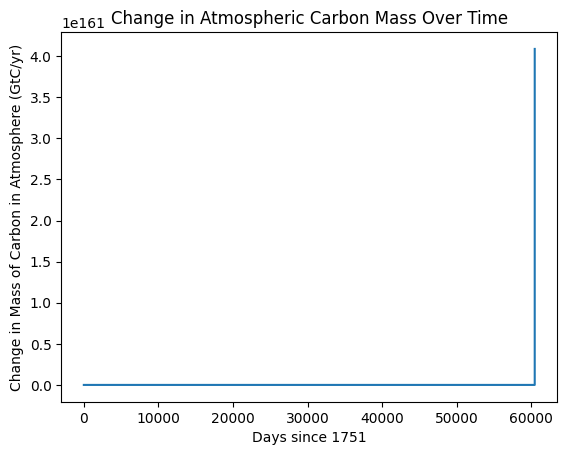

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the historical emissions data
historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)

# Define the parameters
M1 = 1100.0  # Initial mass of carbon in the atmosphere (GtC)
M2 = 300.0   # Initial mass of carbon in the biosphere (GtC)
k12 = 0.0003  # Photosynthesis rate constant
k21 = 0.1     # Respiration/decomposition rate constant

start_year = 1751
end_year = 2008

# Create an array of time values for each day in the simulation
total_days = (end_year - start_year + 1) * 365  # Total number of days
t = np.linspace(0, total_days, total_days)  # Create a time array from 0 to total_days

# Load the years and carbon flux from the data
year = data[:, 0]
cflux = data[:, 1]

# Convert the days back to years for interpolation
year_days = (year - start_year) * 365  # Convert years to days for interpolation
cflux_t = np.interp(t, year_days, cflux)

# For storing results
M1_values = []
M2_values = []

# Main simulation loop
for day in range(total_days):
    # Calculate the fluxes
    F12 = k12 * M1 * M2  # Flux from atmosphere to biosphere (photosynthesis)
    F21 = k21 * M2       # Flux from biosphere to atmosphere (respiration)


    M1 += (F21 - F12 + cflux_t[day])
    M2 += (F12 - F21)

    # Store the values for analysis later
    M1_values.append(M1)
    M2_values.append(M2)

# Now use np.diff on M1_values to calculate the change over time
M1_changes = np.diff(M1_values)

plt.plot(t[1:], M1_changes)  # Plotting changes over time (shifted by one time step)
plt.xlabel('Days since 1751')
plt.ylabel('Change in Mass of Carbon in Atmosphere (GtC/yr)')
plt.title('Change in Atmospheric Carbon Mass Over Time')
plt.show()

## 2. Assignment Tasks

For all plots, label all axes and provide units.

__Problem A: Modify and rerun the model__

1. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., $M_2$). Use the following parameters:

  * $M_1^0$ = 1100.0
  * $M_2^0$ = 300.0
  * $k_{12}$ = 0.0003
  * $k_{21}$ = 0.1  

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for `t = 100` years with a daily time step (i.e., `dt = 1/365`)
3. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation

__Problem B: Examine impacts of human emissions__

1. Load the anthropogenic emissions data for 1751-2008 (see numpy `np.loadtxt()` command usage [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). Note that the data is in a comma separated variable file (named `AnthropogenicEmissions.1751_2008.csv`) with one header row.
2. Plot the anthropogenic emissions data  
3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:

  * Mass of C in the atmosphere versus time
  * Mass of C in the land versus time
  * The change in mass of C in the atmosphere vs time
  * The change in mass of C in the biosphere vs time
    
4. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation in 2008.

__Problem C: Examine the effects of mitigation__

1. Load the alternative emission scenarios contained in the file `.csv`, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).
2. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __B(4)__ above, run the model three times, one for each scenario. Create the following plots:

  * Mass of C in the atmosphere versus time (all three scenarios on one plot)
  * Mass of C in the land versus time (all three scenarios on one plot)
  * The change in mass of C in the atmosphere vs time
  * The change in mass of C in the biosphere vs time


Part A: Modify and rerun the model

In [55]:
# Update the main simulation loop
for day in range(total_days):
    # Calculate the fluxes with the new photosynthesis formula
    F12 = k12 * M1 * M2  # Photosynthesis now depends on both M1 and M2
    F21 = k21 * M2       # Flux from biosphere to atmosphere (respiration)


    M1 += (F21 - F12)  # No anthropogenic emissions for unforced scenario
    M2 += (F12 - F21)
    M1 += (F21 - F12 + cflux_t[day])
    M2 += (F12 - F21)

    # Store the values
    M1_values.append(M1)
    M2_values.append(M2)

In [56]:
print(f'Final mass of carbon in atmosphere (M1): {M1} GtC')
print(f'Final mass of carbon in biosphere (M2): {M2} GtC')

Final mass of carbon in atmosphere (M1): nan GtC
Final mass of carbon in biosphere (M2): nan GtC


ValueError: x and y must have same first dimension, but have shapes (94170,) and (282511,)

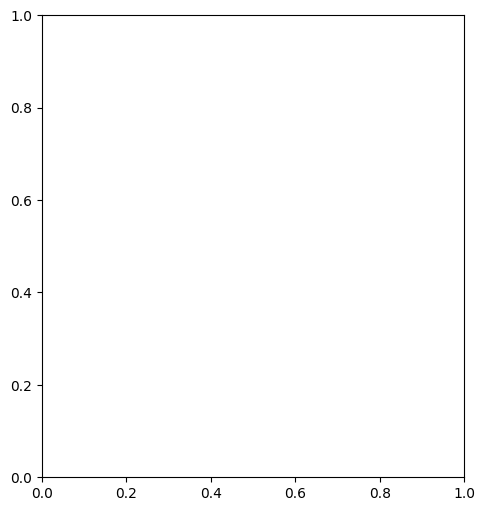

In [57]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, M1_values, label='Atmospheric Carbon (M1)', color='blue')
plt.xlabel('Time (days)')
plt.ylabel('Mass of Carbon in Atmosphere (GtC)')
plt.title('Mass of Carbon in Atmosphere Over Time')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, M2_values, label='Biospheric Carbon (M2)', color='green')
plt.xlabel('Time (days)')
plt.ylabel('Mass of Carbon in Biosphere (GtC)')
plt.title('Mass of Carbon in Biosphere Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()

Part B: Examine impacts of human emissions


In [42]:
historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)
year = data[:, 0]
cflux = data[:, 1]

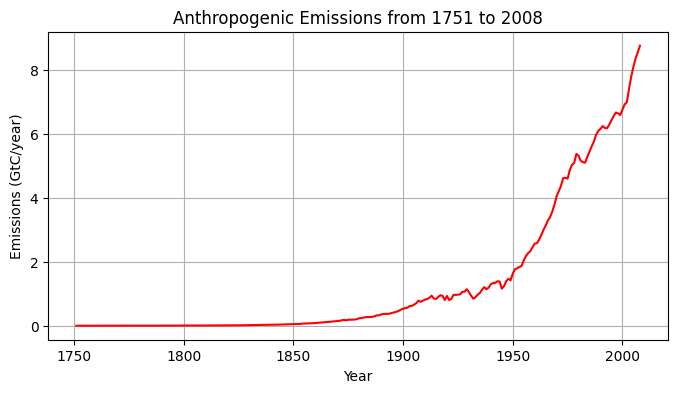

In [43]:
plt.figure(figsize=(8, 4))
plt.plot(year, cflux, label='Anthropogenic Emissions', color='red')
plt.xlabel('Year')
plt.ylabel('Emissions (GtC/year)')
plt.title('Anthropogenic Emissions from 1751 to 2008')
plt.grid(True)
plt.show()

In [44]:
for day in range(total_days):
    F12 = k12 * M1 * M2
    F21 = k21 * M2
    M1 += (F21 - F12 + cflux_t[day])  # Add anthropogenic emissions
    M2 += (F12 - F21)

    M1_values.append(M1)
    M2_values.append(M2)

print(f'Final mass of carbon in atmosphere (M1): {M1} GtC')
print(f'Final mass of carbon in biosphere (M2): {M2} GtC')

Final mass of carbon in atmosphere (M1): nan GtC
Final mass of carbon in biosphere (M2): nan GtC


ValueError: x and y must have same first dimension, but have shapes (94169,) and (1,)

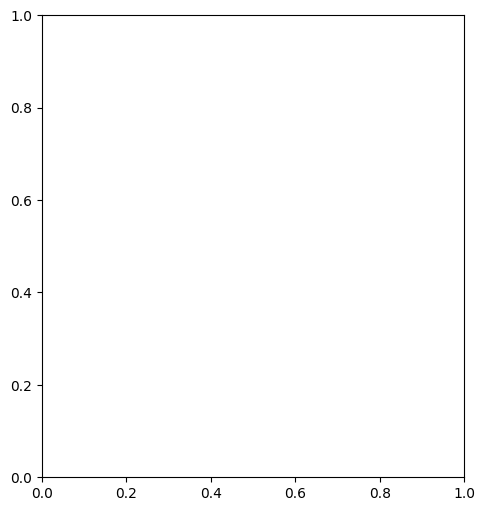

In [54]:
M1_changes = np.diff(M1_values)
M2_changes = np.diff(M2_values)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t[1:], M1_values.append, label='Atmospheric Carbon (M1)', color='blue')
plt.xlabel('Time (days)')
plt.ylabel('Mass of Carbon in Atmosphere (GtC)')
plt.title('Mass of Carbon in Atmosphere Over Time')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t[1:], M2, label='Biospheric Carbon (M2)', color='green')
plt.xlabel('Time (days)')
plt.ylabel('Mass of Carbon in Biosphere (GtC)')
plt.title('Mass of Carbon in Biosphere Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot changes
plt.figure(figsize=(12, 6))
plt.plot(t[1:], M1_changes, label='Change in Atmospheric Carbon', color='blue')
plt.xlabel('Time (days)')
plt.ylabel('Change in Mass (GtC/year)')
plt.title('Change in Atmospheric Carbon Over Time')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t[1:], M2_changes, label='Change in Biospheric Carbon', color='green')
plt.xlabel('Time (days)')
plt.ylabel('Change in Mass (GtC/year)')
plt.title('Change in Biospheric Carbon Over Time')
plt.grid(True)
plt.show()

Part 3 Examine the effects of mitigation

In [48]:
from google.colab import files
uploaded = files.upload()


Saving EmissionsMitigationScenarios.2008_2100.csv to EmissionsMitigationScenarios.2008_2100 (3).csv


In [50]:
future_emissions_file = 'EmissionsMitigationScenarios.2008_2100.csv'
data = np.loadtxt(future_emissions_file, delimiter=',', skiprows=1)
year = data[:, 0]
cflux_nz2030 = data[:, 1]
cflux_nz2050 = data[:, 2]
cflux_zeg = data[:, 3]

In [51]:
plt.figure(figsize=(12, 6))

# Assuming you have M1_values_nz2030, M1_values_nz2050, and M1_values_zeg
plt.plot(t, M1_values_nz2030, label='Net Zero 2030', color='blue')
plt.plot(t, M1_values_nz2050, label='Net Zero 2050', color='orange')
plt.plot(t, M1_values_zeg, label='Zero Emissions Growth', color='green')
plt.xlabel('Time (days)')
plt.ylabel('Mass of Carbon in Atmosphere (GtC)')
plt.title('Mass of Carbon in Atmosphere for Different Scenarios')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'M1_values_nz2030' is not defined

<Figure size 1200x600 with 0 Axes>